# Kaggle Titanic Competition Notebook
### *`Author:`* *Muhammad Furqan*
### *[LinkedIn](https://www.linkedin.com/in/iammuhammadfurqan/)* 
### *[Github](https://github.com/iammuhammadfurqan)*
### *[Kaggle](https://www.kaggle.com/muhammadfurqan0)*
### *`Start Date:`* *22-01-2024*
### *`End Date:`* *23-01-2024*
### *`Dataset:`* *[Titanic Dataset](https://www.kaggle.com/competitions/titanic)*


### Dataset Description
#### Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

#### Data Dictionary

| Variable  | Definition                                 | Key                                         |
|-----------|--------------------------------------------|---------------------------------------------|
| survival  | Survival                                   | 0 = No, 1 = Yes                              |
| pclass    | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                    |
| sex       | Sex                                        |                                             |
| Age       | Age in years                               |                                             |
| sibsp     | # of siblings / spouses aboard the Titanic |                                             |
| parch     | # of parents / children aboard the Titanic |                                             |
| ticket    | Ticket number                              |                                             |
| fare      | Passenger fare                             |                                             |
| cabin     | Cabin number                               |                                             |
| embarked  | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton|

#### Variable Notes
**`pclass`**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**`age`**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\
**`sibsp`**: The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)\
**`parch`**: The dataset defines family relations in this way...\
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\

Some children travelled only with a nanny, therefore parch=0 for them.

# **Survival Rate Prediction with the Help of Tensorflow**

In [46]:
# Import the Libraries
# 1. To handle data 
import pandas as pd
import numpy as np
# 2. To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 3. To preprocess data

In [47]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

## Let's Explore the Data

### Sneak Preview of Data

Achieve a rapid glimpse of your dataset with just one line of code! This convenient approach allows you to swiftly review the initial rows of your data, providing you with an instant grasp of the dataset's content without the need to scroll through the entire file.

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### View Column Names

In [51]:
#View the column names, alternatively we can also use df.columns
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### View Column Data Types

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### View the shape of Our dataset

In [53]:
#view the shape of the data, number of rows & columns
# df.shape[0] give information about the rows and df.shape[1] gives information about columns
print(f"The dataframe has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataframe has 891 rows and 12 columns


### Summary of Data Characteristics

Descriptive statistics are employed to succinctly summarize and gain insight into the fundamental characteristics of the dataset.

In [54]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values in the Data

In [55]:
missing_values = (df_train.isnull().sum() / len(df_train) * 100).sort_values(ascending=False)
missing_values

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [56]:
df_train.drop(['Cabin'], axis=1, inplace=True)

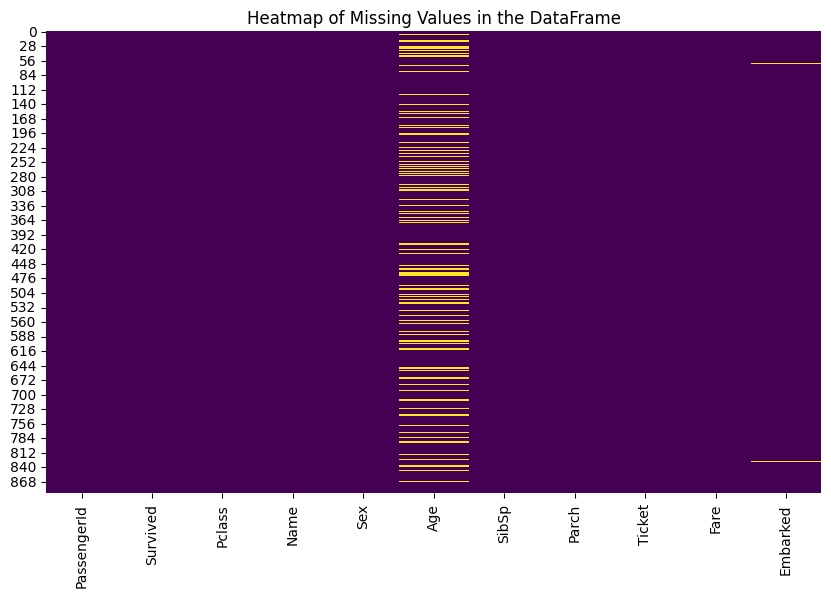

In [57]:
# Plot the null values
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False)
plt.title("Heatmap of Missing Values in the DataFrame")
plt.show()

In [58]:
df= df_train.copy()

In [59]:
# Find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# Find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### Function to Impute Missing Values

In [60]:
# define the function to impute the missing values in thal column

from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

categorical_cols = ['Cabin', 'Embarked']
bool_cols = []
numeric_cols = ['Age']

missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [61]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

(df.isnull().sum() / len(df) * 100 ).sort_values(ascending=False)

Missing Values Age : 19.87%


MAE = 9.501477622377623 

RMSE = 11.812770462313855 

R2 = 0.24736577988698427 

Missing Values Embarked : 0.22%
The feature 'Embarked' has been imputed with 87.64 accuracy



PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [62]:
df.isnull().sum() / len(df) * 100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

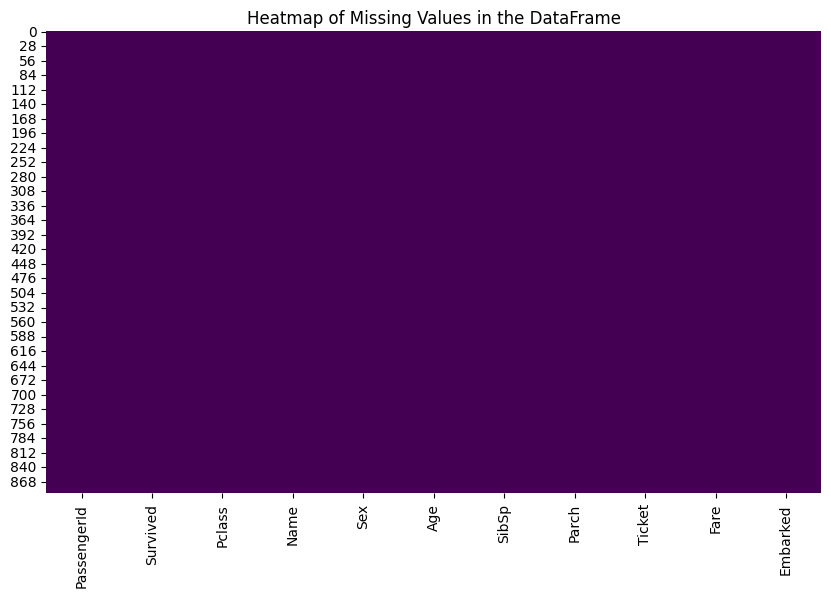

In [63]:
# plot the null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Heatmap of Missing Values in the DataFrame")
plt.show()

### Missing values have been imputed or removed from the dataset

In [64]:
# split the data into X and y
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']

# encode the data
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass
    
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,332,1,1,45.5,0,0,20,28.5000,2
733,734,2,1,23.0,0,0,228,13.0000,2
382,383,3,1,32.0,0,0,665,7.9250,2
704,705,3,1,26.0,1,0,398,7.8542,2
813,814,3,0,6.0,4,2,333,31.2750,2


## Create a Neural Network with TensorFlow for Binary Classification

In [66]:
# use tensorflow to create the neural network
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(64, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 3
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3
    
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

In [67]:
# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Training the model
# model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# # Evaluating the model on the test set
# model.evaluate(X_test, y_test)

Epoch 1/100


23/23 [==============================] - 3s 25ms/step - loss: 2.1447 - accuracy: 0.6180 - val_loss: 0.8330 - val_accuracy: 0.4972
Epoch 2/100
23/23 [==============================] - 0s 10ms/step - loss: 0.7485 - accuracy: 0.6152 - val_loss: 0.6313 - val_accuracy: 0.6760
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.6306 - val_loss: 0.5946 - val_accuracy: 0.7039
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6473 - accuracy: 0.6475 - val_loss: 0.5693 - val_accuracy: 0.7039
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6643 - val_loss: 0.6080 - val_accuracy: 0.6983
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.6348 - val_loss: 0.6726 - val_accuracy: 0.5754
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6475 - val_loss: 0.6210 - val_accuracy: 0.7095
Epoch 8/100
23/23 [====

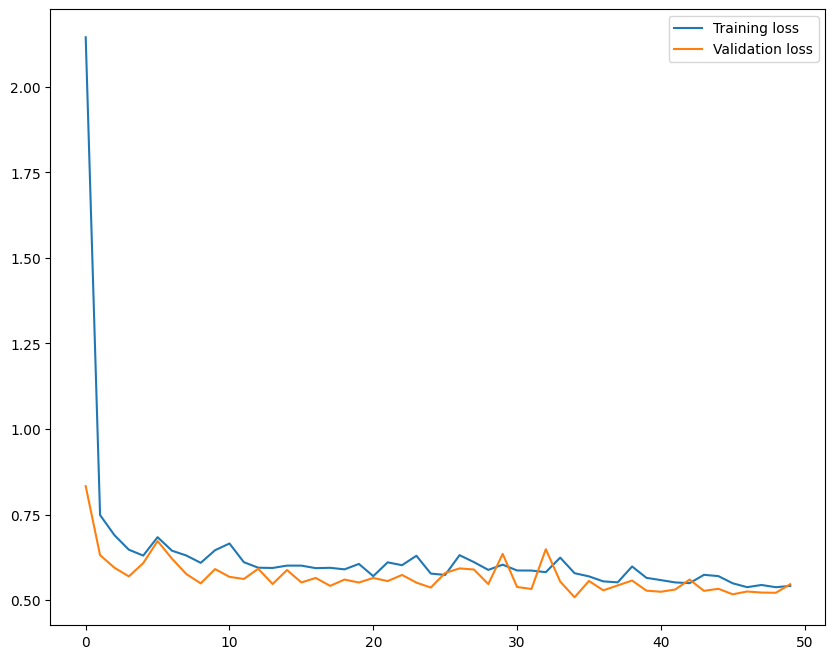

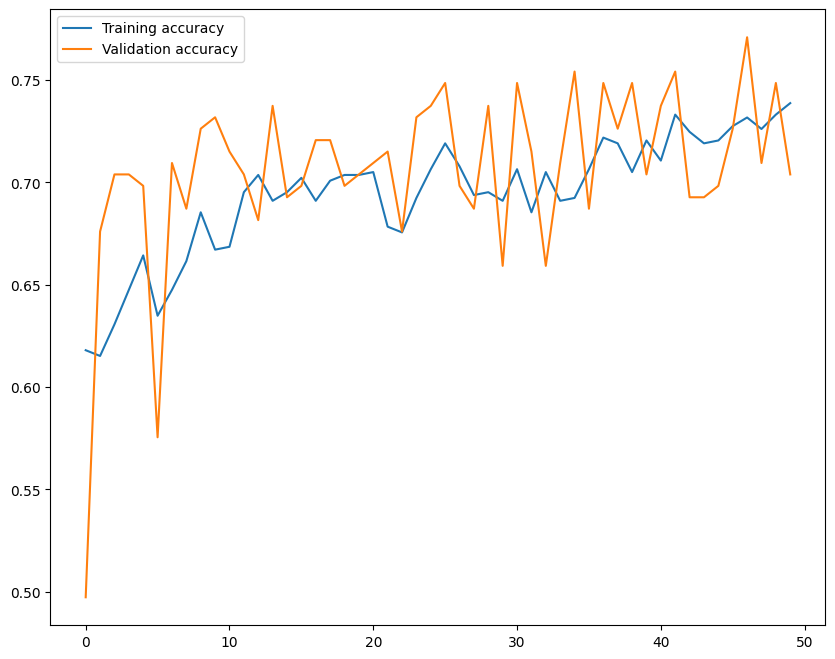

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the callback function
early_stopping = EarlyStopping(patience=15)


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()